#### IE 3034 - Sistemas de Control 2
#### Eduardo Santizo
#### Gabriela Iriarte
### Simulación de COVID 19
#### 20/04/2019

Descripción: Este programa tiene las gráficas y los modelos con parámetros inventados (no válidos) para 3 modelos diferentes: SIR, SEIR y SEIRD para representar el comportamiento del coronavirus en italia. Se importaron los datos de otros dos países para que luego sea fácil copiar el archivo y cambiar las variables y ya.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

direc = "C:/Users/Gaby/Documents/5A1S/control2/Covid19/"
general = os.path.join(direc,'owid-covid-data.csv')
recuperados = os.path.join(direc,'time_series_covid19_recovered_global.csv')
recuperados_18 = os.path.join(direc,'time_series_covid19_recovered_global_18.csv')

df = pd.read_csv(general, sep=",",encoding = 'latin_1')
df_rec = pd.read_csv(recuperados, sep=",",encoding = 'latin_1', error_bad_lines=False)
df_rec_18 = pd.read_csv(recuperados_18, sep=",",encoding = 'latin_1', error_bad_lines=False)
df_CHN = df[df['location']=='China'][['location','date','total_cases','new_cases','total_deaths']]
df_GTM = df[df['location']=='Guatemala'][['location','date','total_cases','new_cases','total_deaths']]
df_IT = df[df['location']=='Italy'][['location','date','total_cases','new_cases','total_deaths']]
val_it = df_rec_18[df_rec_18['Country/Region']=='Italy'][['4/18/20']]
val_chn = df_rec_18[df_rec_18['Country/Region']=='China'][['4/18/20']].sum(axis = 0, skipna = True)

# Arreglando db de los recuperados en Guatemala
df_rec.columns
GTM_rec = df_rec[df_rec['Country/Region']=='Guatemala']
GTM_rec = GTM_rec.iloc[0,57:]#.transpose()
GTM_rec.name = "recovered"
GTM_rec = pd.DataFrame(GTM_rec[0:])
GTM_rec.index.name = 'date'
GTM_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[21]})
GTM_rec = GTM_rec.append(df_extra)

# Arreglando db de los recuperados en Italia
IT_rec = df_rec[df_rec['Country/Region']=='Italy']
IT_rec = IT_rec.iloc[0,4:] # En el 34
IT_rec.name = "recovered"
IT_rec = pd.DataFrame(IT_rec[0:])
IT_rec.index.name = 'date'
IT_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[44927]})
IT_rec = IT_rec.append(df_extra)
#original_date = df_CHN['date']
#orig = pd.Series(np.zeros(53),index=original_date.iloc[0:53])
#IT_rec = pd.concat([orig, IT_rec], axis=0)

# Arreglando db de los recuperados en China
CHN_rec = df_rec[df_rec['Country/Region']=='China']
CHN_rec = CHN_rec.iloc[:,4:]
CHN_rec= CHN_rec.sum(axis = 0, skipna = True)
CHN_rec.name = "recovered"
CHN_rec = pd.DataFrame(CHN_rec[0:])
CHN_rec.index.name = 'date'
CHN_rec.reset_index(inplace=True)
df_extra = pd.DataFrame({"date":["2020-04-18"],"recovered":[val_chn[0]]})
CHN_rec = CHN_rec.append(df_extra)

### COLORES
rojo_cool = (1, 0.2, 0.14)
aqua = (0.141, 1, 0.368)
naranja = (1, 0.627, 0.141)
azuloso = (0.254, 0.141, 1)
verde_cool = (0.058, 0.8, 0.086)# (0.57, 0.93, 0.27)
azul_cool = (0.27,0.45,0.93)
negro_cool = (0.12, 0.12, 0.12)
blanco_cool = (0.72, 0.72, 0.72)
gris_cool = (0.490, 0.490, 0.490)


b'Skipping line 244: expected 91 fields, saw 92\n'


In [ ]:
 Duration of viral shedding ranged between 8 and 37 days.

# SIR model

In [49]:
def SIR(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta*I*(S/N)
    dIdt = beta*I*(S/N)-gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt

In [82]:
N = 60.36*(10**6)
# periodo de incubación de coronavirus es 1-14 días
# https://www.who.int/news-room/q-a-detail/q-a-coronaviruses
R0 = 1
D = 2
gamma = 1/D
beta = R0/gamma
I0 = df_IT['total_cases'].iloc[31] # contagiados inicialmente 
S0 = N-I0
R0 = 0

y0 = S0, I0, R0
t = np.linspace(0, 100, 100) # días

ret = odeint(SIR, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

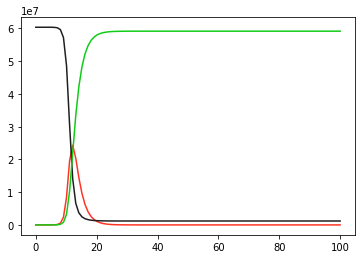

In [83]:
fig = plt.figure()
ax = plt.axes()
#ax.set_yscale('log')
plt.plot(t,I,color=rojo_cool)
plt.plot(t,S,color=negro_cool)
plt.plot(t,R,color=verde_cool)

# SEIR model

In [86]:
def SEIR(y, t, N, beta, gamma, delta):
    S, I, R, E = y
    dSdt = -beta*I*(S/N)
    dEdt = beta*I*(S/N)-delta*E
    dIdt = delta*E-gamma*I
    dRdt = gamma*I
    return dSdt, dIdt, dRdt, dEdt

In [87]:
N = 1000#60.36*(10**6)
D = 4
gamma = 1/D
beta = 1
delta = 1
I0 = df_IT['total_cases'].iloc[31] # contagiados inicialmente 
S0 = N-I0
R0 = 0
E0 = 0

y0 = S0, I0, R0, E0
t = np.linspace(1, 100, 100) # días

ret = odeint(SEIR, y0, t, args=(N, beta, gamma, delta))
S, I, R, E= ret.T

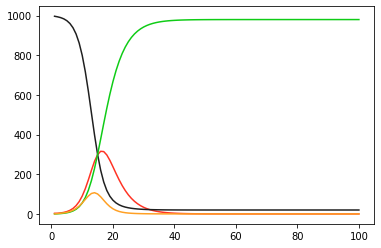

In [89]:
fig = plt.figure()
ax = plt.axes()
#ax.set_yscale('log')
plt.plot(t,I,color=rojo_cool)
plt.plot(t,S,color=negro_cool)
plt.plot(t,R,color=verde_cool)
plt.plot(t,E,color=naranja)
plt.show()

# SEIRD model

In [91]:
def SEIRD(y, t, N, beta, gamma, delta, f): # delta = alpha del paper y el 1/Ti = gamma
    S, I, R, E, D = y
    dSdt = -beta*I*(S/N)
    dEdt = beta*I*(S/N)-delta*E
    dIdt = delta*E-gamma*I
    dRdt = gamma*I*(1-f)
    dDdt = f*I*gamma
    return dSdt, dIdt, dRdt, dEdt, dDdt

In [93]:
N = 1000#60.36*(10**6)
D = 4
gamma = 1/D
beta = 1
delta = 1
f = 0.1
I0 = df_IT['total_cases'].iloc[31] # contagiados inicialmente 
S0 = N-I0
R0 = 0
E0 = 0
D0 = 0

y0 = S0, I0, R0, E0, D0
t = np.linspace(1, 100, 100) # días

ret = odeint(SEIRD, y0, t, args=(N, beta, gamma, delta, f))
S, I, R, E, D = ret.T

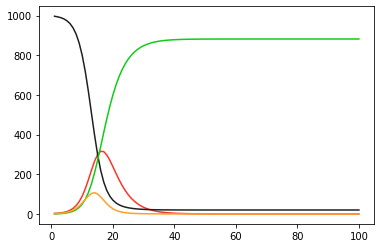

In [94]:
fig = plt.figure()
ax = plt.axes()
#ax.set_yscale('log')
plt.plot(t,I,color=rojo_cool)
plt.plot(t,S,color=negro_cool)
plt.plot(t,R,color=verde_cool)
plt.plot(t,E,color=naranja)
plt.show()